# Link google drive (Python Core)

In [1]:
# set working pathway to your own google drive doc
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# if do not want to change to R core
%load_ext rpy2.ipython

In [ ]:
# if do not want to change to R core, every module should start with "%%R"
%%R
R.Version()

# Download example dataset(s) (Python Core)

In [ ]:
#main dir
import os
try:
  os.mkdir("/content/drive/My Drive/PP_Bioinformatics/")
except FileExistsError:
  print("directory already exist. OK to continue")

In [ ]:
#project 1
import os
try:
  os.mkdir("/content/drive/My Drive/PP_Bioinformatics/1.SC/")
except FileExistsError:
  print("directory already exist. OK to continue")
try:
  os.mkdir("/content/drive/My Drive/PP_Bioinformatics/1.SC/datasets/")
except FileExistsError:
  print("directory already exist. OK to continue")
try:
  os.mkdir("/content/drive/My Drive/PP_Bioinformatics/1.SC/results/")
except FileExistsError:
  print("directory already exist. OK to continue")

In [ ]:
#download dataset GSE232240
import os
os.chdir("/content/drive/My Drive/PP_Bioinformatics/1.SC/datasets/")
if os.path.isfile("/content/drive/My Drive/PP_Bioinformatics/1.SC/datasets/GSE232240_count.txt"):
  print("Already have GSE232240_count.txt")
else:
  !wget -O GSE232240_count.txt.gz ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7324nnn/GSM7324294/suppl/GSM7324294_Count_data_IMCISION.txt.gz
  !gzip -d GSE232240_count.txt.gz
if os.path.isfile("/content/drive/My Drive/PP_Bioinformatics/1.SC/datasets/GSE232240_metadata.txt"):
  print("Already have GSE232240_metadata.txt")
else:
  !wget -O GSE232240_metadata.txt.gz ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7324nnn/GSM7324295/suppl/GSM7324295_Meta_data_IMCISION.txt.gz
  !gzip -d GSE232240_metadata.txt.gz

In [ ]:
!head GSE232240_count.txt

# Install packages (change to R Core)(run them every time)

In [1]:
#10min to 30min
install.packages("Seurat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘Matrix’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘Rcpp’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘shiny’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’




In [23]:
library(Seurat)
library(ggplot2)

# Seurat object(s) generating

In [ ]:
new_counts=read.table(file="/content/drive/MyDrive/PP_Bioinformatics/1.SC/datasets/GSE232240_count.txt")
GSE232240_scRNA=CreateSeuratObject(counts=new_counts,min.cells=3)

In [ ]:
head(GSE232240_scRNA@meta.data)

In [3]:
GSE232240_metadata=read.table("/content/drive/MyDrive/PP_Bioinformatics/1.SC/datasets/GSE232240_metadata.txt",sep='\t',header=T)

In [11]:
GSE232240_scRNA[["patient"]]=GSE232240_metadata$patient
GSE232240_scRNA[["response"]]=GSE232240_metadata$response
GSE232240_scRNA[["timepoint"]]=GSE232240_metadata$timepoint
GSE232240_scRNA[["mc_group"]]=GSE232240_metadata$mc_group
GSE232240_scRNA[["cell_type"]]=GSE232240_metadata$cell_type

In [ ]:
save(GSE232240_scRNA,file="/content/drive/MyDrive/PP_Bioinformatics/1.SC/results/GSE232240_scRNA.RData")

# Quality control

In [21]:
if(!"GSE232240_scRNA" %in% ls()) load("/content/drive/MyDrive/PP_Bioinformatics/1.SC/results/GSE232240_scRNA.RData")
GSE232240_scRNA[["percent.mt"]]=PercentageFeatureSet(GSE232240_scRNA,pattern="^MT-")
GSE232240_scRNA[["percent.rb"]]=PercentageFeatureSet(GSE232240_scRNA,pattern="^RP[SL]")
HB.genes=c("HBA1","HBA2","HBB","HBD","HBE1","HBG1","HBG2","HBM","HBQ1","HBZ")
HB.genes=CaseMatch(HB.genes,rownames(GSE232240_scRNA))
GSE232240_scRNA[["percent.HB"]]=PercentageFeatureSet(GSE232240_scRNA,features=HB.genes)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


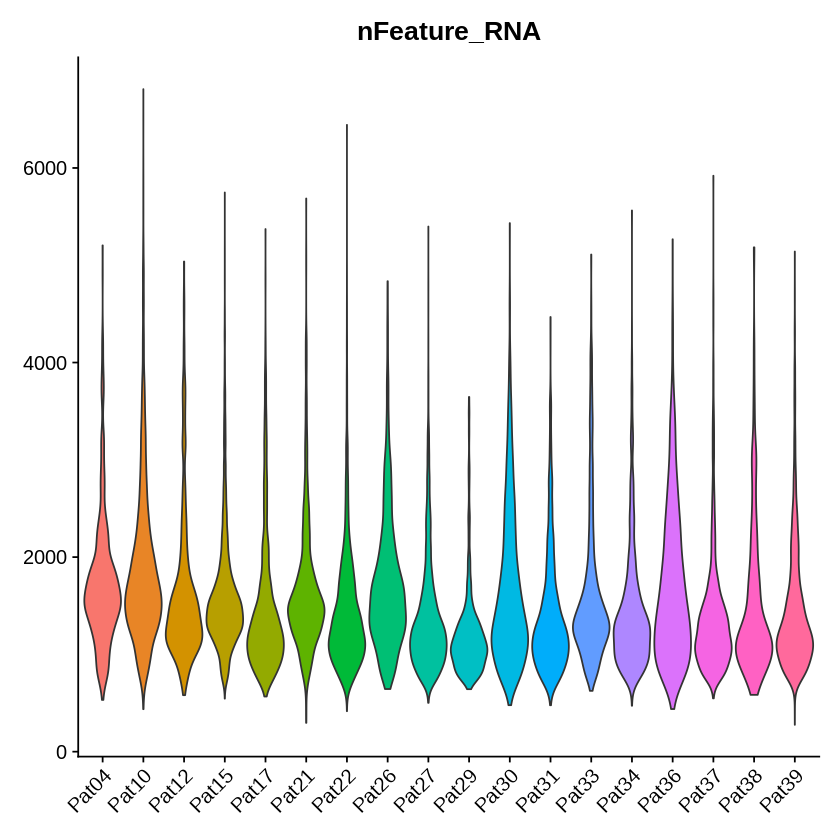

In [24]:
VlnPlot(GSE232240_scRNA,features=c('nFeature_RNA'),raster=FALSE,
        group.by="patient",pt.size=0)+theme(axis.title.x=element_blank())+NoLegend()